In [6]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target


print(X.shape)
print(y)

(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)


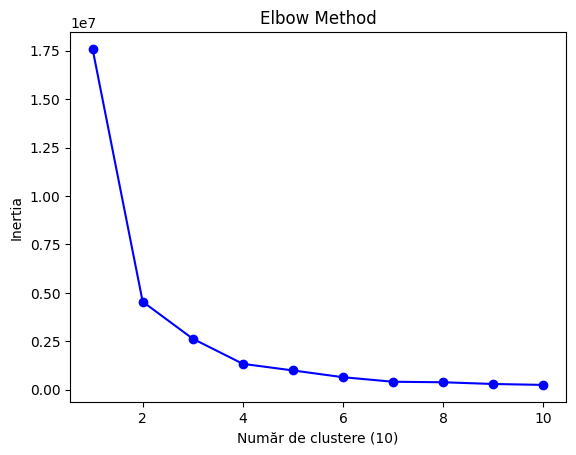

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel(f'Număr de clustere ({k})')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [10]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    print(f'k={k}, Silhouette Score={score}')


k=2, Silhouette Score=0.6568536504294317
k=3, Silhouette Score=0.5711381937868838
k=4, Silhouette Score=0.5620915308951057
k=5, Silhouette Score=0.5040308632722521
k=6, Silhouette Score=0.5188384682332549
k=7, Silhouette Score=0.5574646654973109
k=8, Silhouette Score=0.5385504170231252
k=9, Silhouette Score=0.524796938056894
k=10, Silhouette Score=0.49457522001052795


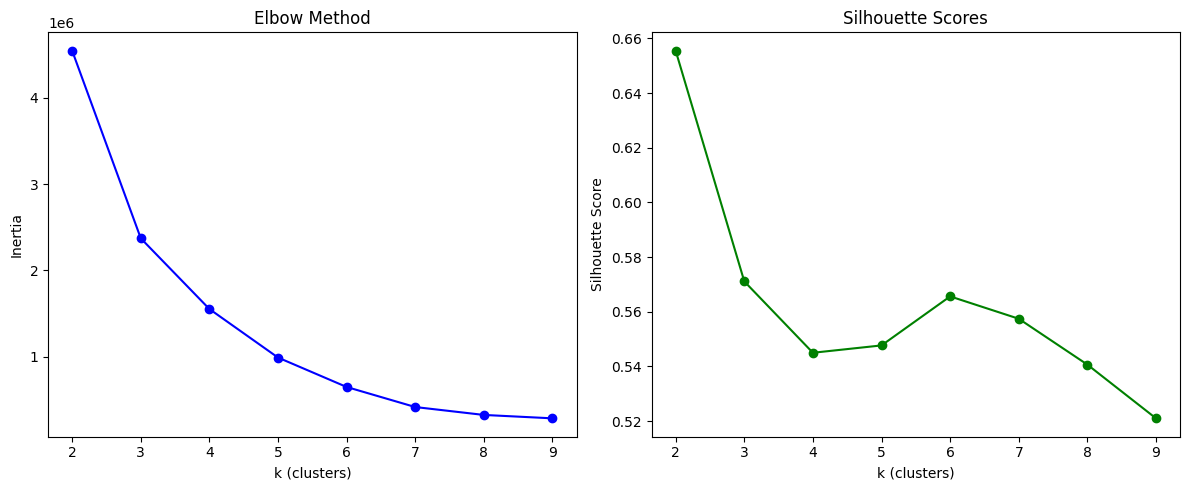

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Example: 10 vectors, each of 13 dimensions
data = X

inertias = []
silhouette_scores = []
k_values = range(2, min(10, len(data)))  # k must be < n_samples

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

# Plot Elbow + Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, 'bo-')
plt.title("Elbow Method")
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'go-')
plt.title("Silhouette Scores")
plt.xlabel("k (clusters)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()
